# **CRIANDO A VARIAVEL NOMES**

*   read_json
*   sample()



In [1]:
import pandas as pd

In [2]:
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=20&sexo=f")

In [ ]:
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=20&sexo=m")

In [ ]:
nomes_f.sample(5)

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
16,JULIA,0,430067,17,F
1,ANA,0,3079729,2,F
12,AMANDA,0,464624,13,F
8,PATRICIA,0,529446,9,F


In [ ]:
nomes_m.sample(5)

,nome,regiao,freq,rank,sexo
11,GABRIEL,0,922744,12,M
2,ANTONIO,0,2567494,3,M
3,FRANCISCO,0,1765197,4,M
4,CARLOS,0,1483121,5,M
18,RAIMUNDO,0,611174,19,M


In [ ]:
print('quantidade de nomes: ' + str(len(nomes_m) + len(nomes_f)))

quantidade de nomes: 40


In [ ]:
frames = [nomes_m, nomes_f]

In [ ]:
nomes = pd.concat(frames)['nome'].to_frame()

In [ ]:
nomes.head()

,nome
0,JOSE
1,JOAO
2,ANTONIO
3,FRANCISCO
4,CARLOS


# **INCLUINDO ID DOS ALUNOS**

*   numpy(random.seed, random.permutation, random.choice)
*   str.cat, str.lower



In [ ]:
import numpy as np

In [ ]:
np.random.seed(123)

In [ ]:
total_alunos = len(nomes)

In [ ]:
nomes['id_aluno'] = np.random.permutation(total_alunos) + 1

In [ ]:
nomes.sample(5)

,nome,id_aluno
8,LUIZ,14
15,LETICIA,20
0,MARIA,26
11,CAMILA,37
8,PATRICIA,10


In [ ]:
dominios = ['@dominiodoemmail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [ ]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [ ]:
nomes.sample(5)

,nome,id_aluno,dominio,email
14,JESSICA,23,@dominiodoemmail.com.br,jessica@dominiodoemmail.com.br
2,ANTONIO,13,@servicodoemail.com,antonio@servicodoemail.com
12,AMANDA,33,@servicodoemail.com,amanda@servicodoemail.com
9,MARCOS,21,@servicodoemail.com,marcos@servicodoemail.com
11,GABRIEL,38,@dominiodoemmail.com.br,gabriel@dominiodoemmail.com.br


# **CRIANDO A TABELA CURSOS**

In [ ]:
!pip3 install html5lib
!pip3 install lxml

In [ ]:
import html5lib

In [ ]:
url = 'https://tabela-cursos.herokuapp.com/index.html'

In [ ]:
cursos = pd.read_html(url)

In [ ]:
cursos = cursos[0]

In [ ]:
cursos.head(5)

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


# **MUDANDO O INDEX DO CURSO**

In [ ]:
cursos = cursos.rename(columns={'Nome do curso': 'nome_do_curso'})

In [ ]:
cursos['id'] = cursos.index + 1

In [ ]:
cursos

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5
5,PHP com MySql,6
6,.NET para web,7
7,Novas integrações com Java,8
8,TDD com Java,9
9,Código limpo com C#,10


In [ ]:
cursos = cursos.set_index('id')

In [ ]:
cursos

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python
6,PHP com MySql
7,.NET para web
8,Novas integrações com Java
9,TDD com Java


# **MATRICULANDO OS ALUNOS**

*   np.random.exponencial
*   np.ceil



In [ ]:
nomes.sample(5)

,nome,id_aluno,dominio,email
4,CARLOS,6,@dominiodoemmail.com.br,carlos@dominiodoemmail.com.br
0,JOSE,7,@dominiodoemmail.com.br,jose@dominiodoemmail.com.br
13,BRUNA,34,@dominiodoemmail.com.br,bruna@dominiodoemmail.com.br
15,BRUNO,40,@servicodoemail.com,bruno@servicodoemail.com
11,GABRIEL,38,@dominiodoemmail.com.br,gabriel@dominiodoemmail.com.br


In [ ]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos)* 1.5).astype(int)

In [ ]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
2,FRANCISCA,27,@servicodoemail.com,francisca@servicodoemail.com,1
9,ALINE,16,@dominiodoemmail.com.br,aline@dominiodoemmail.com.br,4
6,PEDRO,24,@servicodoemail.com,pedro@servicodoemail.com,7
14,JESSICA,23,@dominiodoemmail.com.br,jessica@dominiodoemmail.com.br,2
12,RAFAEL,25,@servicodoemail.com,rafael@servicodoemail.com,1


In [ ]:
nomes.matriculas.describe()

count    40.000000
mean      2.050000
std       1.299901
min       1.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       7.000000
Name: matriculas, dtype: float64

In [ ]:
import seaborn as sns

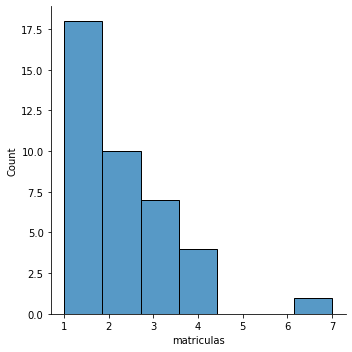

In [ ]:
sns.displot(nomes.matriculas)

In [ ]:
nomes.matriculas.value_counts()

1    18
2    10
3     7
4     4
7     1
Name: matriculas, dtype: int64

# **SELECIONANDO CURSOS**

*   np.random.rand
*   Item da lista



In [ ]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
15,BRUNO,40,@servicodoemail.com,bruno@servicodoemail.com,2
8,LUIZ,14,@dominiodoemmail.com.br,luiz@dominiodoemmail.com.br,1
16,EDUARDO,4,@servicodoemail.com,eduardo@servicodoemail.com,1
6,MARCIA,15,@dominiodoemmail.com.br,marcia@dominiodoemmail.com.br,2
12,RAFAEL,25,@servicodoemail.com,rafael@servicodoemail.com,1


In [ ]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [ ]:
for index, row in nomes.iterrows():
  id = row.id_aluno
  matriculas = row.matriculas
  for i in range(matriculas):
    mat = [id, np.random.choice(cursos.index, p = prob)]
    todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])
matriculas.head(10)

,id_aluno,id_curso
0,7,12
1,7,11
2,7,6
3,11,2
4,13,13
5,13,4
6,39,13
7,6,6
8,6,17
9,12,13


In [ ]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,6,Lógica de programação
2,3,Java para Web
3,3,C# para Web
4,5,Ruby on Rails
5,1,Cursos de Python
6,2,PHP com MySql
7,7,.NET para web
9,4,TDD com Java
10,2,Código limpo com C#


In [ ]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
5,PAULO,12,@servicodoemail.com,paulo@servicodoemail.com,4
12,RAFAEL,25,@servicodoemail.com,rafael@servicodoemail.com,1
13,DANIEL,8,@servicodoemail.com,daniel@servicodoemail.com,1
5,JULIANA,28,@dominiodoemmail.com.br,juliana@dominiodoemmail.com.br,1
1,ANA,5,@servicodoemail.com,ana@servicodoemail.com,3


In [ ]:
cursos.sample(5)

,nome_do_curso
id,
3,C# para Web
4,Ruby on Rails
19,Boas práticas em Java
18,Programação funcional
1,Lógica de programação


In [ ]:
matriculas.sample(5)

,id_aluno,id_curso
72,18,17
11,12,14
15,24,9
41,17,15
24,38,15


In [ ]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

In [ ]:
matriculas_por_curso

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,6,Lógica de programação
2,3,Java para Web
3,3,C# para Web
4,5,Ruby on Rails
5,1,Cursos de Python
6,2,PHP com MySql
7,7,.NET para web
9,4,TDD com Java
10,2,Código limpo com C#


# **SAIDAS POR CURSO**

In [ ]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,6,Lógica de programação
2,3,Java para Web
3,3,C# para Web
4,5,Ruby on Rails
5,1,Cursos de Python


In [ ]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index=False)

In [ ]:
pd.read_csv('matriculas_por_curso.csv')

,quantidade_de_alunos,nome_do_curso
0,6,Lógica de programação
1,3,Java para Web
2,3,C# para Web
3,5,Ruby on Rails
4,1,Cursos de Python
5,2,PHP com MySql
6,7,.NET para web
7,4,TDD com Java
8,2,Código limpo com C#
9,4,Preparatório para certificação Java


In [ ]:
matriculas_json = matriculas_por_curso.to_json()

In [ ]:
matriculas_json

'{"quantidade_de_alunos":{"1":6,"2":3,"3":3,"4":5,"5":1,"6":2,"7":7,"9":4,"10":2,"11":4,"12":4,"13":13,"14":6,"15":5,"17":9,"18":3,"19":2,"20":3},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [ ]:
matriculas_html = matriculas_por_curso.to_html()

In [ ]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>6</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>3</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>3</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>5</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>1</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>2</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>7</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>9</th>
      <td>4</td>
      <td>TDD com Java</td>
    </tr>
    <tr>
      <th>10</th>
      <td>2</td>
      <td>Código limpo

# **CRIANDO O BANCO SQL**

!pip3 install sqlalchemy

In [ ]:
from sqlalchemy import create_engine, MetaData, Table

In [ ]:
engine = create_engine('sqlite:///:memory:')

In [ ]:
engine

Engine(sqlite:///:memory:)

In [ ]:
type(engine)

sqlalchemy.engine.base.Engine

In [ ]:
matriculas_por_curso.to_sql('matriculas', engine)

In [ ]:
print(engine.table_names())

['matriculas']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


# **BUSCANDO NO BANCO SQL**

In [ ]:
query = 'select * from matriculas where quantidade de alunos > 20'

In [ ]:
pd.read_sql(query, engine)

In [ ]:
pd.read_sql_table('matriculas', engine, columns=[])

,id_curso,quantidade_de_alunos,nome_do_curso
0,1,6,Lógica de programação
1,2,3,Java para Web
2,3,3,C# para Web
3,4,5,Ruby on Rails
4,5,1,Cursos de Python
5,6,2,PHP com MySql
6,7,7,.NET para web
7,9,4,TDD com Java
8,10,2,Código limpo com C#
9,11,4,Preparatório para certificação Java


In [ ]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

In [ ]:
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,6
1,Java para Web,3
2,C# para Web,3
3,Ruby on Rails,5
4,Cursos de Python,1
5,PHP com MySql,2
6,.NET para web,7
7,TDD com Java,4
8,Código limpo com C#,2
9,Preparatório para certificação Java,4


In [ ]:
muitas_matriculas.query('quantidade_de_alunos >= 5')

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,6
3,Ruby on Rails,5
6,.NET para web,7
11,Persistência com .NET,13
12,Desenvolvendo jogos,6
13,Análise de dados,5
14,Internet das coisas,9


In [ ]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos >= 5')

In [ ]:
muitas_matriculas.to_sql('muitas_matriculas', con=engine)

In [ ]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


# **NOMES DOS ALUNOS DA PROX TURMA**

In [ ]:
matriculas_por_curso

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,6,Lógica de programação
2,3,Java para Web
3,3,C# para Web
4,5,Ruby on Rails
5,1,Cursos de Python
6,2,PHP com MySql
7,7,.NET para web
9,4,TDD com Java
10,2,Código limpo com C#


In [ ]:
matriculas

,id_aluno,id_curso
0,7,12
1,7,11
2,7,6
3,11,2
4,13,13
...,...,...
77,29,15
78,3,2
79,3,14
80,3,17


In [ ]:
id_curso = 13
proxima_turma = matriculas.query("id_curso == {}".format(id_curso))

In [ ]:
proxima_turma

,id_aluno,id_curso
4,13,13
6,39,13
9,12,13
16,24,13
18,24,13
21,14,13
22,21,13
35,32,13
50,36,13
57,10,13


In [ ]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
0,MARIA,26,@servicodoemail.com,maria@servicodoemail.com,2
8,PATRICIA,10,@servicodoemail.com,patricia@servicodoemail.com,2
9,ALINE,16,@dominiodoemmail.com.br,aline@dominiodoemmail.com.br,4
14,JESSICA,23,@dominiodoemmail.com.br,jessica@dominiodoemmail.com.br,2
1,JOAO,11,@servicodoemail.com,joao@servicodoemail.com,1


In [ ]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
10,13,PATRICIA,@servicodoemail.com,patricia@servicodoemail.com,2
12,13,PAULO,@servicodoemail.com,paulo@servicodoemail.com,4
13,13,ANTONIO,@servicodoemail.com,antonio@servicodoemail.com,2
14,13,LUIZ,@dominiodoemmail.com.br,luiz@dominiodoemmail.com.br,1
16,13,ALINE,@dominiodoemmail.com.br,aline@dominiodoemmail.com.br,4
21,13,MARCOS,@servicodoemail.com,marcos@servicodoemail.com,1
24,13,PEDRO,@servicodoemail.com,pedro@servicodoemail.com,7
24,13,PEDRO,@servicodoemail.com,pedro@servicodoemail.com,7
31,13,SANDRA,@dominiodoemmail.com.br,sandra@dominiodoemmail.com.br,2


In [ ]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
10     PATRICIA
12        PAULO
13      ANTONIO
14         LUIZ
16        ALINE
21       MARCOS
24        PEDRO
24        PEDRO
31       SANDRA
32       FELIPE
35      LUCIANA
36      ANTONIA
39    FRANCISCO
Name: nome, dtype: object

In [ ]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

,nome
id_aluno,
10,PATRICIA
12,PAULO
13,ANTONIO
14,LUIZ
16,ALINE
21,MARCOS
24,PEDRO
24,PEDRO
31,SANDRA


In [ ]:
nome_curso = cursos.loc[id_curso]

In [ ]:
nome_curso = nome_curso.nome_do_curso

In [ ]:
nome_curso

'Persistência com .NET'

In [ ]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [ ]:
proxima_turma


,nome
id_aluno,
10,PATRICIA
12,PAULO
13,ANTONIO
14,LUIZ
16,ALINE
21,MARCOS
24,PEDRO
24,PEDRO
31,SANDRA


In [ ]:
proxima_turma = proxima_turma.rename(columns = {'nome' : 'Alunos do curso de {}'.format(nome_curso)})

In [ ]:
proxima_turma.head()

,Alunos do curso de Persistência com .NET
id_aluno,
10,PATRICIA
12,PAULO
13,ANTONIO
14,LUIZ
16,ALINE


# **EXPORTANDO PARA EXCEL**

In [ ]:
proxima_turma.to_excel('proxima_turma.xlsx', index = False)

In [ ]:
pd.read_excel('proxima_turma.xlsx')

,Alunos do curso de Persistência com .NET
0,PATRICIA
1,PAULO
2,ANTONIO
3,LUIZ
4,ALINE
5,MARCOS
6,PEDRO
7,PEDRO
8,SANDRA
9,FELIPE
